<h1><center>Generalizing the Efficacy of Vaccines and Predicting Future Cases</center></h1>
<center>Spring 2022</center>
<center>Kevin Hall</center>
<hr>
<h2><center>Introduction</center></h2>
<p> COVID-19, a novel coronavirus, was first identified in Wuhan, China in 2019. From China, it rapidly spread throughout the world, impacting the lives of millions of people. Due to the lack of knowledge of this new virus, there was global uncertainty when the world could go back to normal. As scientists continued to do research into the characteristics of the virus and vaccine research was being done, governments opted to close their borders and resorted to shutting down nearly every social aspect of life. This method was effective in stopping the spread of COVID-19, but people at home harbored feelings of angst and were eagar to leave the house.</p>
<p>With newly researched and developed vaccines to combat COVID-19, there was a sense of returning normalcy, but the rollout of vaccines was slow due to production not keeping up with demand. When vaccines started to become more available, people could enjoy the things they once did before the pandemic.</p>
<p>In this tutorial, my goal is to analyze the efficacy of vaccines as it pertains to COVID-19 and to generalize to newer viruses that could have the same impact as COVID-19. The impact of vaccines cannot be understated in combatting future pandemics. While data is available for (nearly) all countries, I have chosen three countries that I think encompass different idealogies about controlling the spread of COVID-19: The United States of America, Canada, and China.</p>
<hr>




<h2><center>Getting Started With Data</center></h2>
<p>
This data set is from Our World In Data. This data has already been preprocessed and formatted nicely to allow for easy data analysis. The data is presented in the form of comma separated values (.csv) files. The data is split into smaller .csv files but is available as a large .csv file. Values that have not been reported/recorded at each date has been set to NaN.
</p>

See https://github.com/owid/covid-19-data for the most updated version of this data. In order to preserve the state of this Jupyter Notebook, the data has been downloaded and uploaded as of 5/15/2022.

In [894]:
# Importing data analysis and data visualization libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols

In [895]:
# Read in data as a .csv and store in a Pandas dataframe
data = pd.read_csv('./covid-19-data-master/public/data/owid-covid-data.csv')
countries = pd.read_csv('./covid-19-data-master/public/data/jhu/locations.csv')

<h2> Choosing the Data </h2>

In [896]:
data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [897]:
for attribute in data.columns:
    print(attribute)

iso_code
continent
location
date
total_cases
new_cases
new_cases_smoothed
total_deaths
new_deaths
new_deaths_smoothed
total_cases_per_million
new_cases_per_million
new_cases_smoothed_per_million
total_deaths_per_million
new_deaths_per_million
new_deaths_smoothed_per_million
reproduction_rate
icu_patients
icu_patients_per_million
hosp_patients
hosp_patients_per_million
weekly_icu_admissions
weekly_icu_admissions_per_million
weekly_hosp_admissions
weekly_hosp_admissions_per_million
total_tests
new_tests
total_tests_per_thousand
new_tests_per_thousand
new_tests_smoothed
new_tests_smoothed_per_thousand
positive_rate
tests_per_case
tests_units
total_vaccinations
people_vaccinated
people_fully_vaccinated
total_boosters
new_vaccinations
new_vaccinations_smoothed
total_vaccinations_per_hundred
people_vaccinated_per_hundred
people_fully_vaccinated_per_hundred
total_boosters_per_hundred
new_vaccinations_smoothed_per_million
new_people_vaccinated_smoothed
new_people_vaccinated_smoothed_per_hundre

At first glance, there is an abundant number of columns within this dataframe. We will be looking through a number of them as visualizations to better understand what the trends are.

In [898]:
# Separate each country's data into their own dataframe. Reset the index so it starts from 0 for easy
# indexing and drop the newly created index column
us_data = data[data['location'] == 'United States'].reset_index().drop(columns=['index'])
canada_data = data[data['location'] == 'Canada'].reset_index().drop(columns=['index'])
china_data = data[data['location'] == 'China'].reset_index().drop(columns=['index'])

In [899]:
us_data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,USA,North America,United States,2020-01-22,1.0,NaN,NaN,NaN,NaN,NaN,...,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
1,USA,North America,United States,2020-01-23,1.0,0.0,NaN,NaN,NaN,NaN,...,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
2,USA,North America,United States,2020-01-24,2.0,1.0,NaN,NaN,NaN,NaN,...,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
3,USA,North America,United States,2020-01-25,2.0,0.0,NaN,NaN,NaN,NaN,...,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
4,USA,North America,United States,2020-01-26,5.0,3.0,NaN,NaN,NaN,NaN,...,19.1,24.6,NaN,2.77,78.86,0.926,-8926.0,-3.59,-2.63,-26.811643


In [900]:
canada_data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,CAN,North America,Canada,2020-01-23,2.0,2.0,NaN,NaN,NaN,NaN,...,12.0,16.6,NaN,2.5,82.43,0.929,NaN,NaN,NaN,NaN
1,CAN,North America,Canada,2020-01-24,3.0,1.0,NaN,NaN,NaN,NaN,...,12.0,16.6,NaN,2.5,82.43,0.929,NaN,NaN,NaN,NaN
2,CAN,North America,Canada,2020-01-25,3.0,0.0,NaN,NaN,NaN,NaN,...,12.0,16.6,NaN,2.5,82.43,0.929,NaN,NaN,NaN,NaN
3,CAN,North America,Canada,2020-01-26,3.0,0.0,NaN,NaN,NaN,NaN,...,12.0,16.6,NaN,2.5,82.43,0.929,-883.4,-3.45,-2.39,-23.205895
4,CAN,North America,Canada,2020-01-27,3.0,0.0,NaN,NaN,NaN,NaN,...,12.0,16.6,NaN,2.5,82.43,0.929,NaN,NaN,NaN,NaN


In [901]:
china_data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,CHN,Asia,China,2020-01-22,547.0,NaN,NaN,17.0,NaN,NaN,...,1.9,48.4,NaN,4.34,76.91,0.761,NaN,NaN,NaN,NaN
1,CHN,Asia,China,2020-01-23,639.0,92.0,NaN,18.0,1.0,NaN,...,1.9,48.4,NaN,4.34,76.91,0.761,NaN,NaN,NaN,NaN
2,CHN,Asia,China,2020-01-24,916.0,277.0,NaN,26.0,8.0,NaN,...,1.9,48.4,NaN,4.34,76.91,0.761,NaN,NaN,NaN,NaN
3,CHN,Asia,China,2020-01-25,1399.0,483.0,NaN,42.0,16.0,NaN,...,1.9,48.4,NaN,4.34,76.91,0.761,NaN,NaN,NaN,NaN
4,CHN,Asia,China,2020-01-26,2062.0,663.0,NaN,56.0,14.0,NaN,...,1.9,48.4,NaN,4.34,76.91,0.761,NaN,NaN,NaN,NaN


In [902]:
# Get the date ranges for the United States dataframe for date confirmation
print(us_data['date'][0])
print(us_data['date'][len(us_data['date']) - 1])

2020-01-22
2022-05-14


In [903]:
# Get the date ranges for Canada dataframe for date confirmation
print(canada_data['date'][0])
print(canada_data['date'][len(canada_data['date']) - 1])

2020-01-23
2022-05-14


In [904]:
# Get the date ranges for the China dataframe for date confirmation
print(china_data['date'][0])
print(china_data['date'][len(canada_data['date']) - 1])

2020-01-22
2022-05-13


In [905]:
# To keep data ranges consistent, I will be trimming the beginning and end of each dataframe.
us_data = us_data.drop(len(us_data['date']) - 1)
us_data = us_data.drop(0)
us_data = us_data.reset_index().drop(columns=['index'])

canada_data = canada_data.drop(len(canada_data['date']) - 1)
canada_data = canada_data.reset_index().drop(columns=['index'])

china_data = china_data.drop(0)
china_data = china_data.reset_index().drop(columns=['index'])

<h2> Exploratory Data Analysis </h2>

Let's take a look at COVID-19 metrics for the three chosen countries. The date range for this data is from: 2020-01-23 to 2022-05-13.

<h3>Number of Cases</h3>

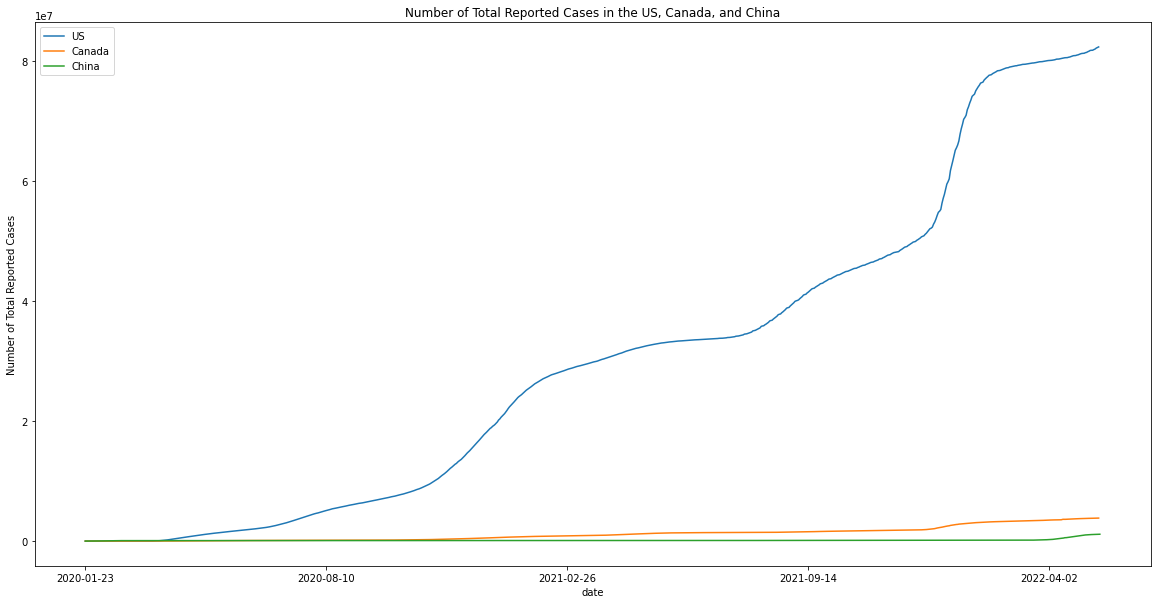

In [906]:
# Graphing the total reported cases of COVID-19
ax = us_data.plot(x='date', y='total_cases', title='Number of Total Reported Cases in the US, Canada, and China')
canada_data.plot(x='date', y='total_cases', ax=ax)
china_data.plot(x='date', y='total_cases', ax=ax, figsize=(20, 10))
ax.set_ylabel('Number of Total Reported Cases')
ax.legend(['US', 'Canada', 'China'])

In [907]:
print(us_data.tail(1)['total_cases'])
print(canada_data.tail(1)['total_cases'])
print(china_data.tail(1)['total_cases'])

841    82421624.0
Name: total_cases, dtype: float64
841    3836099.0
Name: total_cases, dtype: float64
842    1143898.0
Name: total_cases, dtype: float64


Expectedly, the United States has the most total reported cases at 82,421,624. Canada follows with 3,836,099 cases. China is last at 1,143,898 cases. From these numbers, China is a major outlier, especially considering that it is the most populous country in the world. While there has been some speculation that China has misreported the number of cases (https://www.forbes.com/sites/georgecalhoun/2022/01/05/beijing-is-intentionally-underreporting-chinas-covid-death-rate-part-2/?sh=185abfbb73b8), I will be making the assumption that all data in this data set is reported correctly.

Regardless, looking at the raw total reported cases is not the best. Generally speaking, if two countries have the same COVID-19 case percentage, but differing populations, obviously the country with a bigger population will have more COVID-19 cases. Thus I will be using total reported cases PER MILLION as a metric to measure the spread of COVID-19.

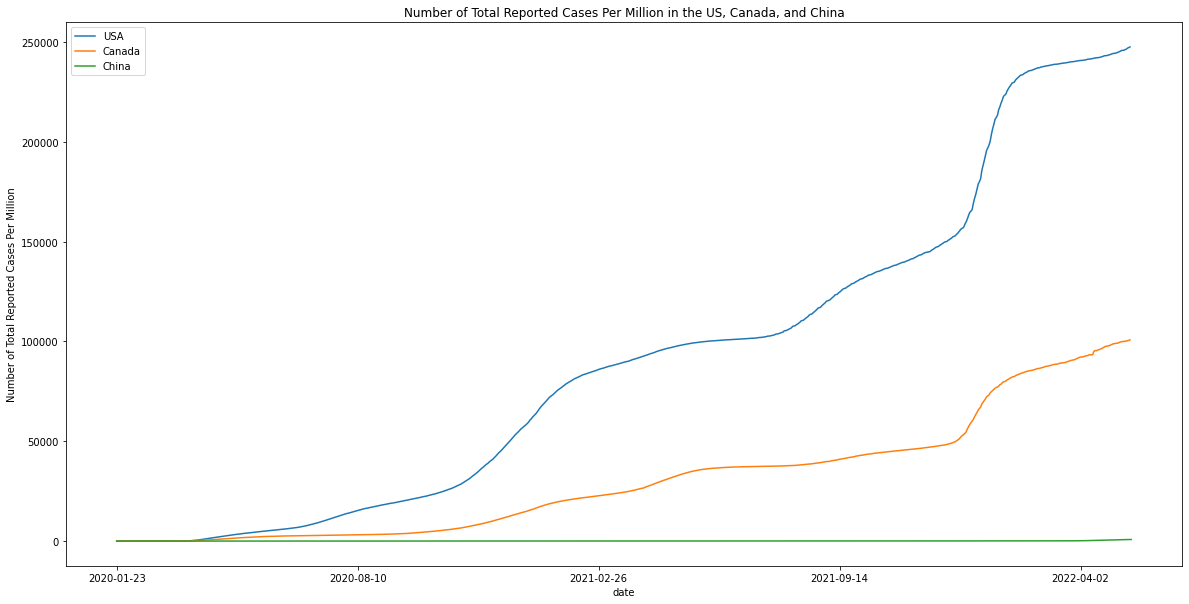

In [908]:
ax = us_data.plot(x='date', y='total_cases_per_million', title='Number of Total Reported Cases Per Million in the US, Canada, and China')
canada_data.plot(x='date', y='total_cases_per_million', ax=ax)
china_data.plot(x='date', y='total_cases_per_million', ax=ax, figsize=(20, 10))
ax.set_ylabel('Number of Total Reported Cases Per Million')
ax.legend(['USA', 'Canada', 'China'])

In [909]:
print(us_data.tail(1)['total_cases_per_million'])
print(canada_data.tail(1)['total_cases_per_million'])
print(china_data.tail(1)['total_cases_per_million'])

841    247575.524
Name: total_cases_per_million, dtype: float64
841    100769.879
Name: total_cases_per_million, dtype: float64
842    792.055
Name: total_cases_per_million, dtype: float64


By normalizing the total reported cases to per million, it is more clear that Canada is not doing as well in terms of preventing total reported cases as the first graph. Remarkably, China has a total reported cases per million of 792. This can be attributed to its large population and also low number of cases as a result of a combination of factors which we will be taking a look at shortly.

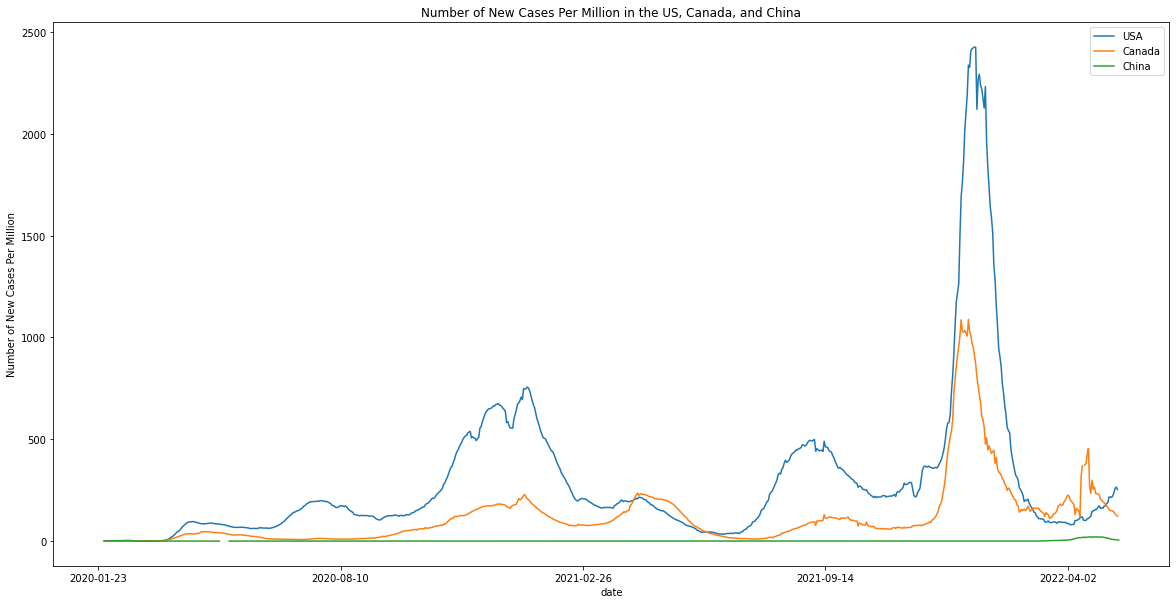

In [910]:
ax = us_data.plot(x='date', y='new_cases_smoothed_per_million', title='Number of New Cases Per Million in the US, Canada, and China')
canada_data.plot(x='date', y='new_cases_smoothed_per_million', ax=ax)
china_data.plot(x='date', y='new_cases_smoothed_per_million', ax=ax, figsize=(20, 10))
ax.set_ylabel('Number of New Cases Per Million')
ax.legend(['USA', 'Canada', 'China'])

<h3> Number of Deaths </h3>

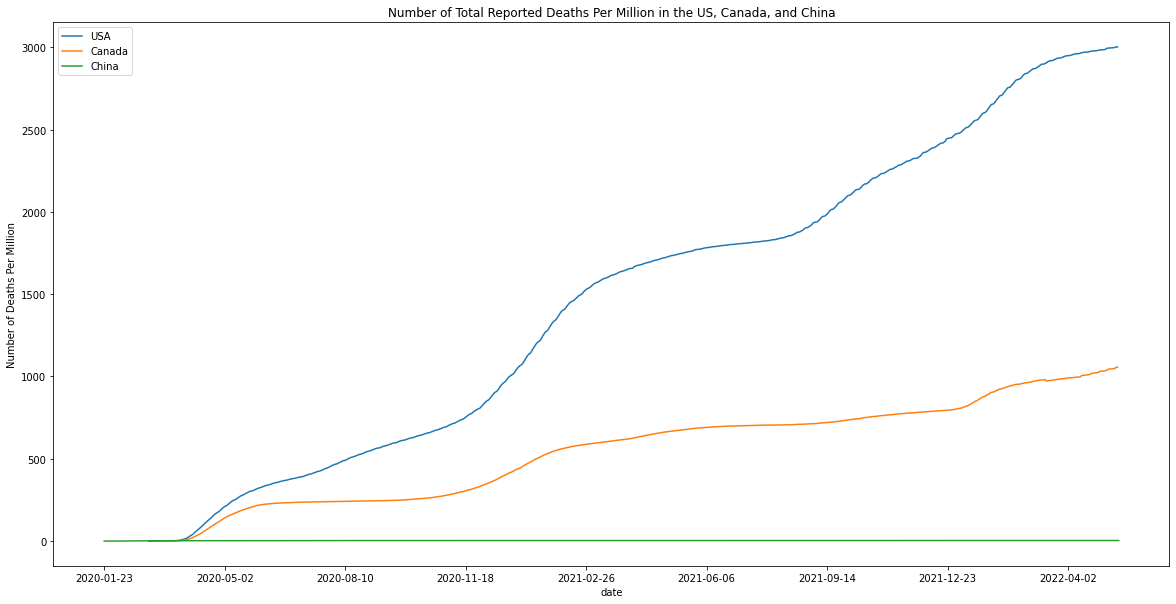

In [911]:
ax = us_data.plot(x='date', y='total_deaths_per_million', title='Number of Total Reported Deaths Per Million in the US, Canada, and China')
canada_data.plot(x='date', y='total_deaths_per_million', ax=ax)
china_data.plot(x='date', y='total_deaths_per_million', ax=ax, figsize=(20, 10))
ax.set_ylabel('Number of Deaths Per Million')
ax.legend(['USA', 'Canada', 'China'])

In [912]:
print(us_data.tail(1)['total_deaths_per_million'])
print(canada_data.tail(1)['total_deaths_per_million'])
print(china_data.tail(1)['total_deaths_per_million'])

841    3002.321
Name: total_deaths_per_million, dtype: float64
841    1057.794
Name: total_deaths_per_million, dtype: float64
842    3.607
Name: total_deaths_per_million, dtype: float64


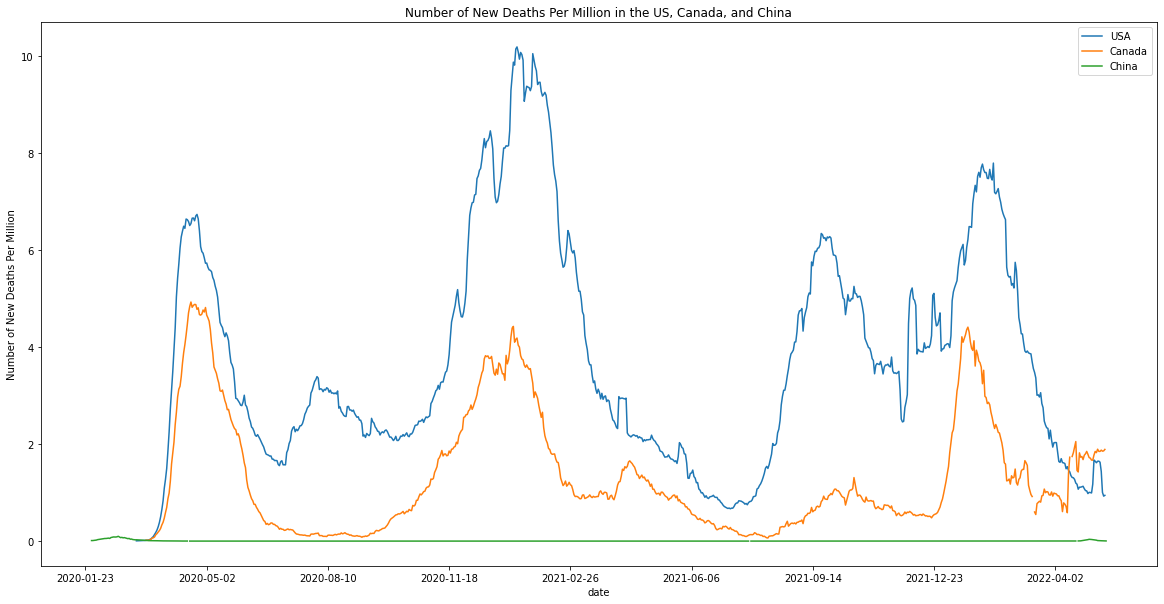

In [913]:
ax = us_data.plot(x='date', y='new_deaths_smoothed_per_million', title='Number of New Deaths Per Million in the US, Canada, and China')
canada_data.plot(x='date', y='new_deaths_smoothed_per_million', ax=ax)
china_data.plot(x='date', y='new_deaths_smoothed_per_million', ax=ax, figsize=(20, 10))
ax.set_ylabel('Number of New Deaths Per Million')
ax.legend(['USA', 'Canada', 'China'])

<h3> Number of Hospitalizations </h3>

Note: No data is available on hospitalizations for China so for this exploratory analysis, I will only be looking at the United States and Canada.

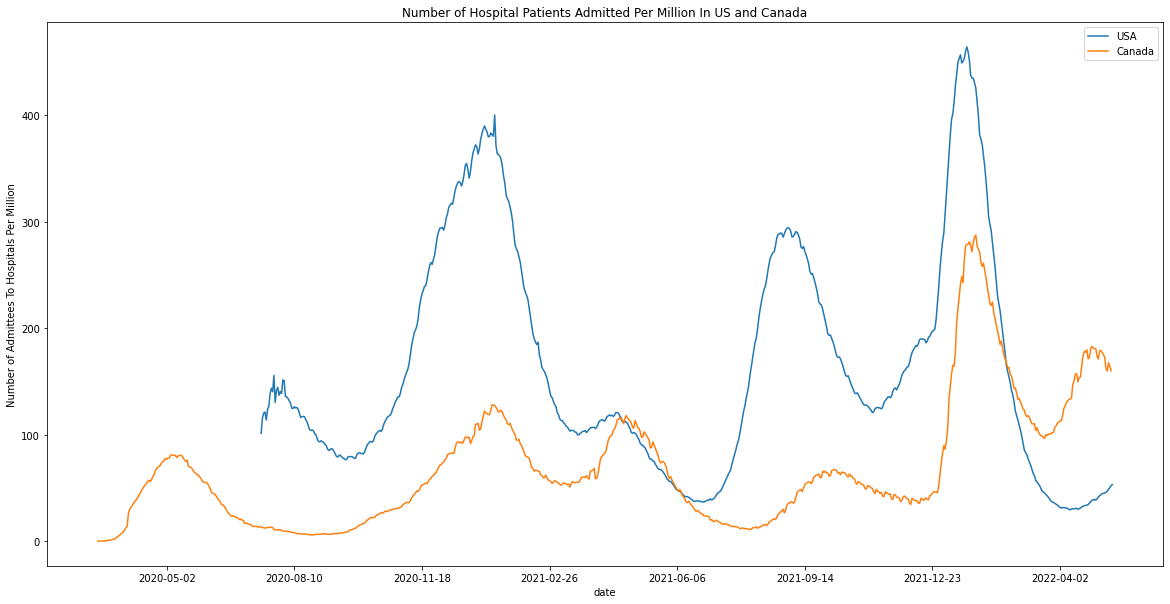

In [914]:
ax = us_data.plot(x='date', y='hosp_patients_per_million', title='Number of Hospital Patients Admitted Per Million In US and Canada')
ax = canada_data.plot(x='date', y='hosp_patients_per_million', ax=ax, figsize=(20, 10))
ax.set_ylabel('Number of Admittees To Hospitals Per Million')
ax.legend(['USA', 'Canada'])

<h3>Correlation Between Hospital Admission and Number of Deaths</h3>

Text(0, 0.5, 'Number of New Deaths Per Million')

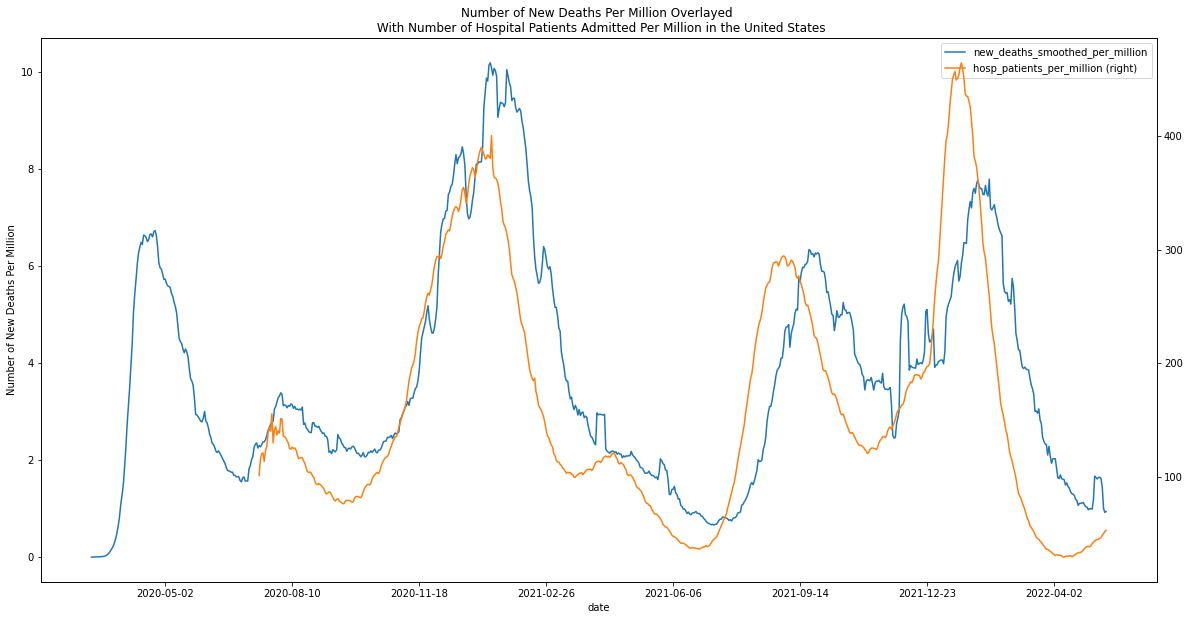

In [915]:
ax = us_data.plot(x='date', y='new_deaths_smoothed_per_million', title='Number of New Deaths Per Million Overlayed \n With Number of Hospital Patients Admitted Per Million in the United States')
us_data.plot(x='date', y='hosp_patients_per_million', secondary_y='hosp_patients_per_million', ax=ax, figsize=(20, 10))
ax.set_ylabel('Number of New Deaths Per Million')

Text(0, 0.5, 'Number of New Deaths Per Million')

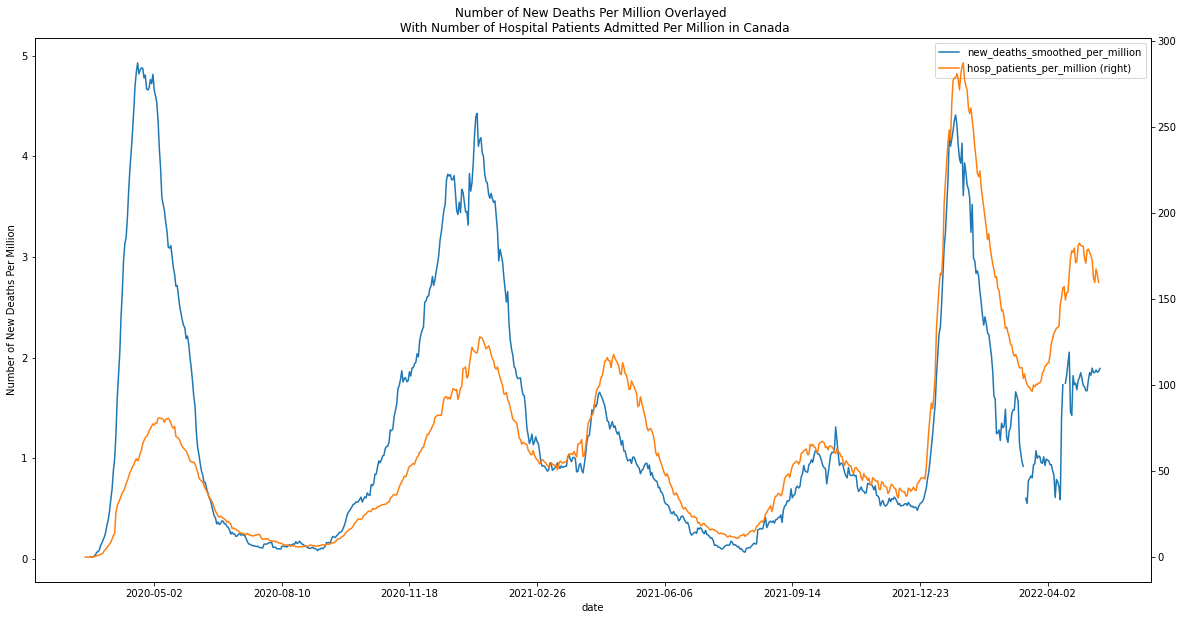

In [916]:
ax = canada_data.plot(x='date', y='new_deaths_smoothed_per_million', title='Number of New Deaths Per Million Overlayed \n With Number of Hospital Patients Admitted Per Million in Canada')
canada_data.plot(x='date', y='hosp_patients_per_million', secondary_y='hosp_patients_per_million', ax=ax, figsize=(20, 10))
ax.set_ylabel('Number of New Deaths Per Million')

From the above graph, there is a shadow effect when plotting both the number of new deaths per million and number of hospital patients admitted per million. One possible cause is the fact that rising cases results in more patients being admitted until hospitals are overfilled. Because hospitals are at capacity, people are left to fend for themselves and sadly passing away (https://www.latimes.com/california/story/2021-02-18/la-me-covid-hospitals-deaths).

<h3>Vaccinations</h3>

In this section, I will be looking at the correlation between vaccines and other metrics. We should expect the number of COVID-19 cases and deaths to go down with the rise of vaccines.

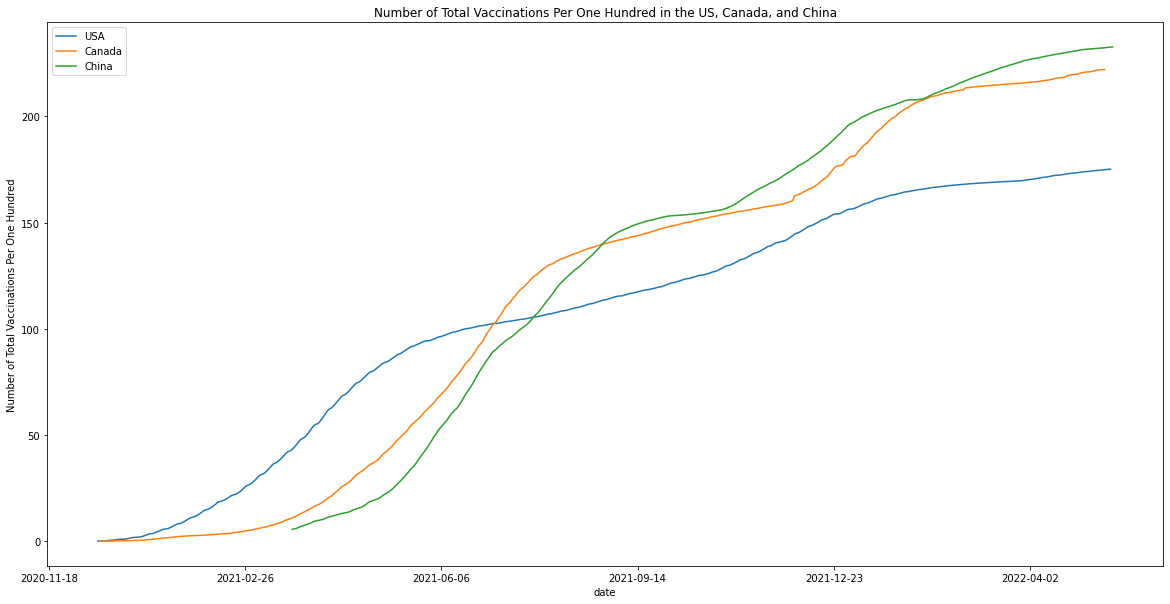

In [917]:
ax = us_data.plot(x='date', y='total_vaccinations_per_hundred', title='Number of Total Vaccinations Per One Hundred in the US, Canada, and China')
canada_data.plot(x='date', y='total_vaccinations_per_hundred', ax=ax)
china_data.plot(x='date', y='total_vaccinations_per_hundred', ax=ax, figsize=(20, 10))
ax.set_ylabel('Number of Total Vaccinations Per One Hundred')
ax.legend(['USA', 'Canada', 'China'])

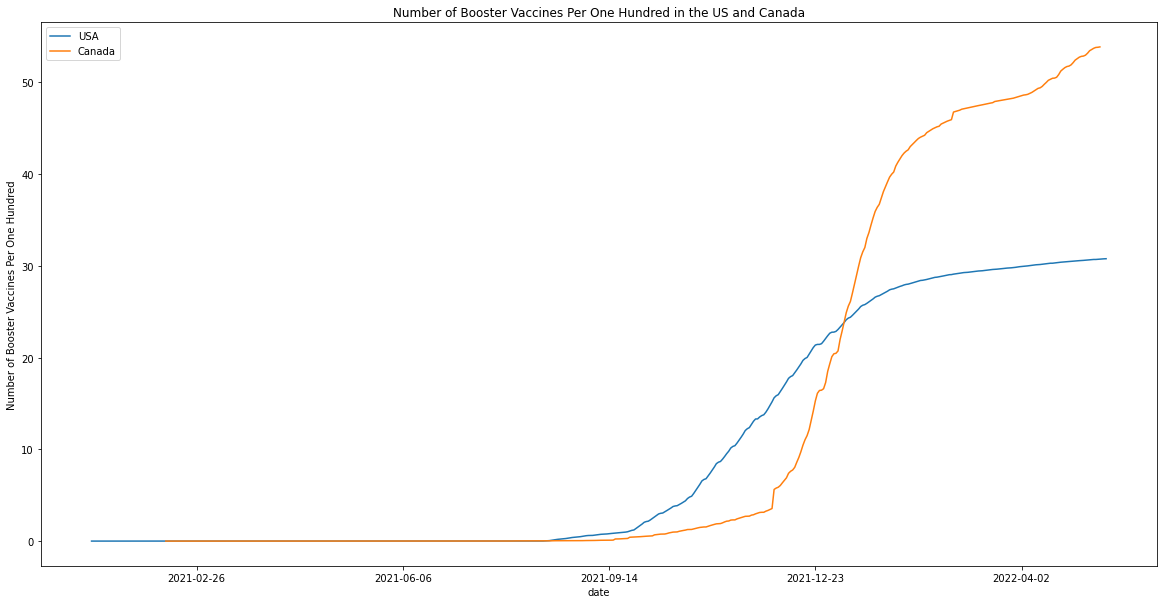

In [918]:
ax = us_data.plot(x='date', y='total_boosters_per_hundred', title='Number of Booster Vaccines Per One Hundred in the US and Canada')
canada_data.plot(x='date', y='total_boosters_per_hundred', ax=ax, figsize=(20, 10))
ax.set_ylabel('Number of Booster Vaccines Per One Hundred')
ax.legend(['USA', 'Canada'])

Text(0, 0.5, 'Number of New Cases Per Million')

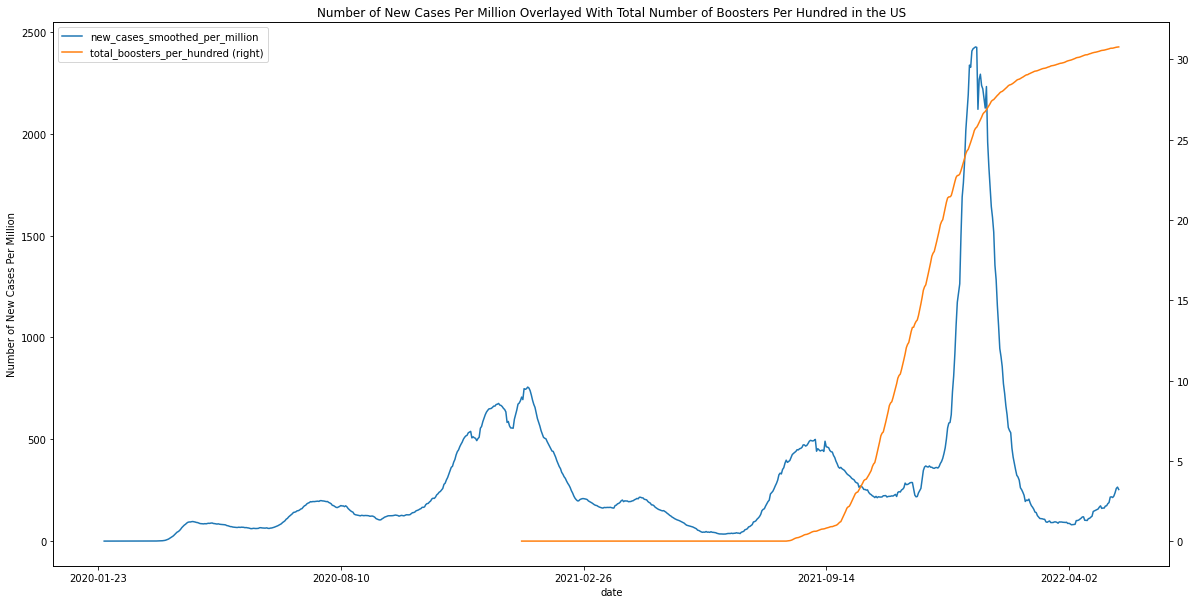

In [919]:
ax = us_data.plot(x='date', y='new_cases_smoothed_per_million', title='Number of New Cases Per Million Overlayed With Total Number of Boosters Per Hundred in the US', figsize=(20, 10))
us_data.plot(x='date', y='total_boosters_per_hundred', ax=ax, secondary_y='total_boosters_per_hundred')
ax.set_ylabel('Number of New Cases Per Million')

Text(0, 0.5, 'Number of Booster Vaccines Per Hundred')

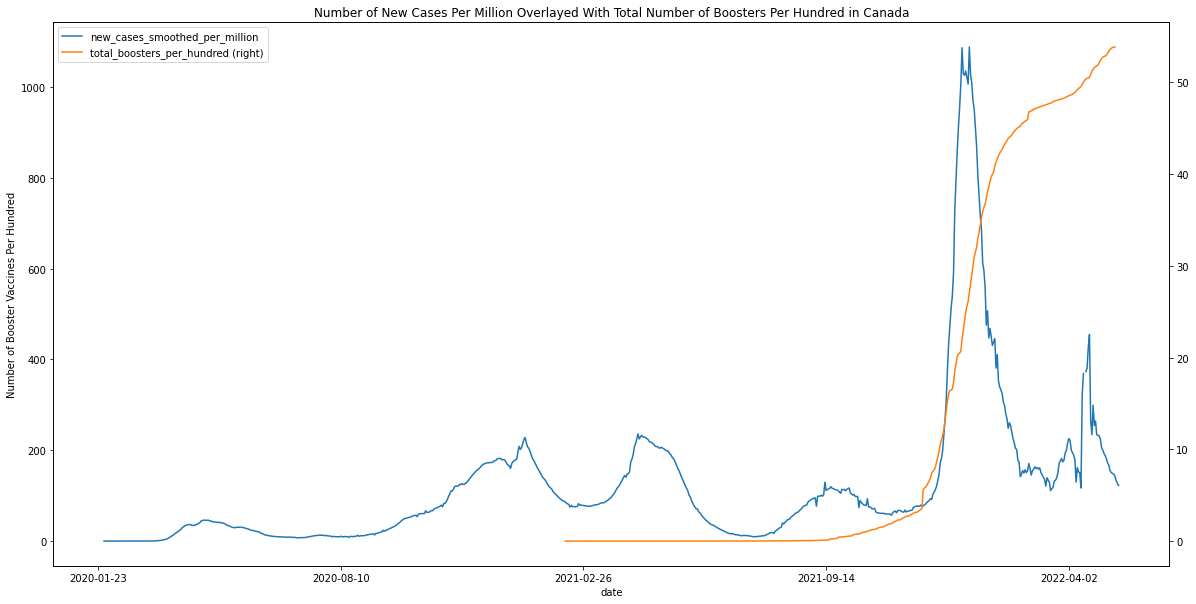

In [920]:
ax = canada_data.plot(x='date', y='new_cases_smoothed_per_million', title='Number of New Cases Per Million Overlayed With Total Number of Boosters Per Hundred in Canada')
canada_data.plot(x='date', y='total_boosters_per_hundred', ax=ax, secondary_y='total_boosters_per_hundred',figsize=(20, 10))
ax.set_ylabel('Number of Booster Vaccines Per Hundred')

From the above section(s) in which we analyzed the number of COVID-19 cases, we see a resurgence of COVID-19 in late 2021 followed by a sharp fall. The dates of the decline are close to the rise of booster vaccine shots. Based on these graphs, the dates do align with studies suggesting that COVID-19 vaccines lose efficacy over time (https://www.yalemedicine.org/news/how-long-will-coronavirus-vaccine-last). The immediate consequence of reduced efficacy are increased number of cases like we see in this graph.

Text(0, 0.5, 'Number of Fully Vaccinated People Per One Hundred')

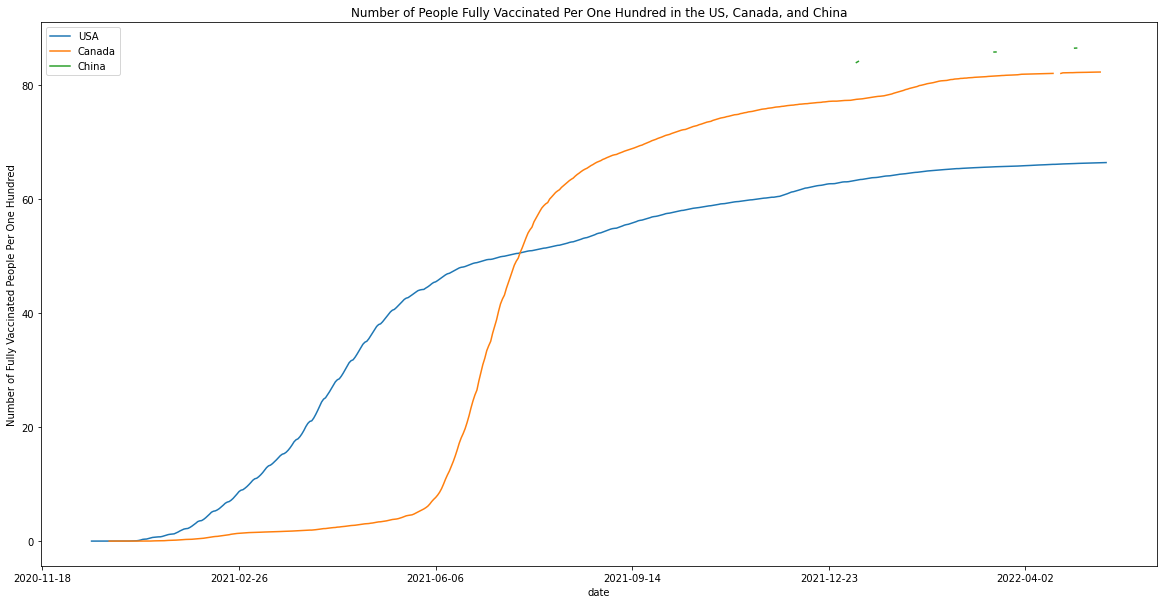

In [921]:
ax = us_data.plot(x='date', y='people_fully_vaccinated_per_hundred', title='Number of People Fully Vaccinated Per One Hundred in the US, Canada, and China')
canada_data.plot(x='date', y='people_fully_vaccinated_per_hundred', ax=ax)
china_data.plot(x='date', y='people_fully_vaccinated_per_hundred', ax=ax, figsize=(20, 10))
ax.legend(['USA', 'Canada', 'China'])
ax.set_ylabel('Number of Fully Vaccinated People Per One Hundred')

Again, there is missing data about the number of fully vaccinated people in China, but there are some data points nearing the end of 2021 and in early 2022. China is reported to have over 80 people per 100 people (80%) full vaccination rate.

Text(0, 0.5, 'Number of New Vaccines Per Million')

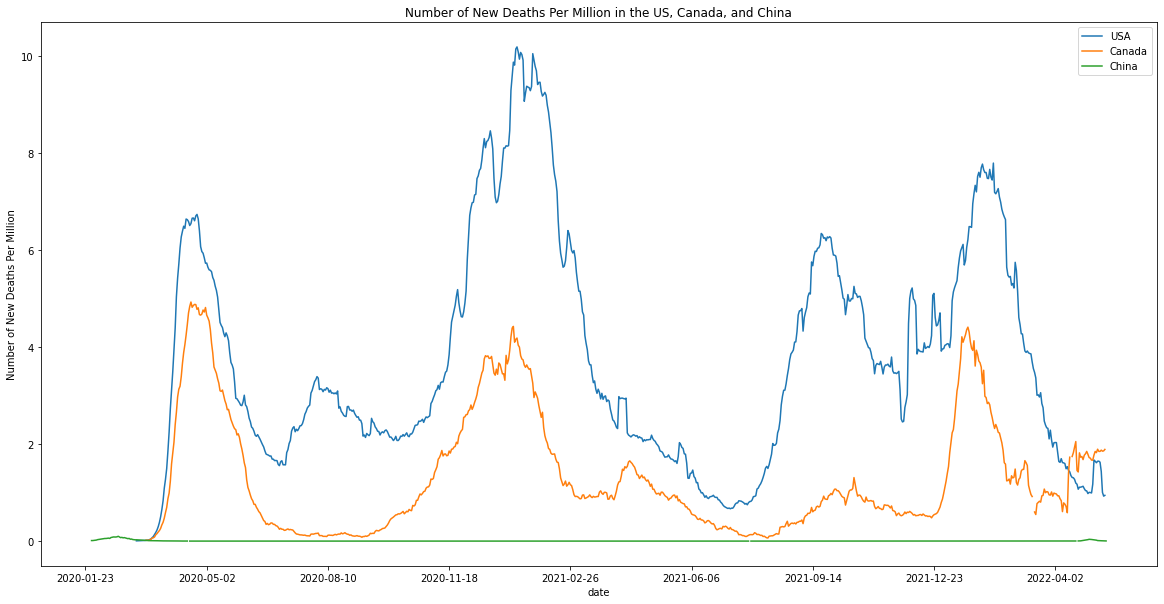

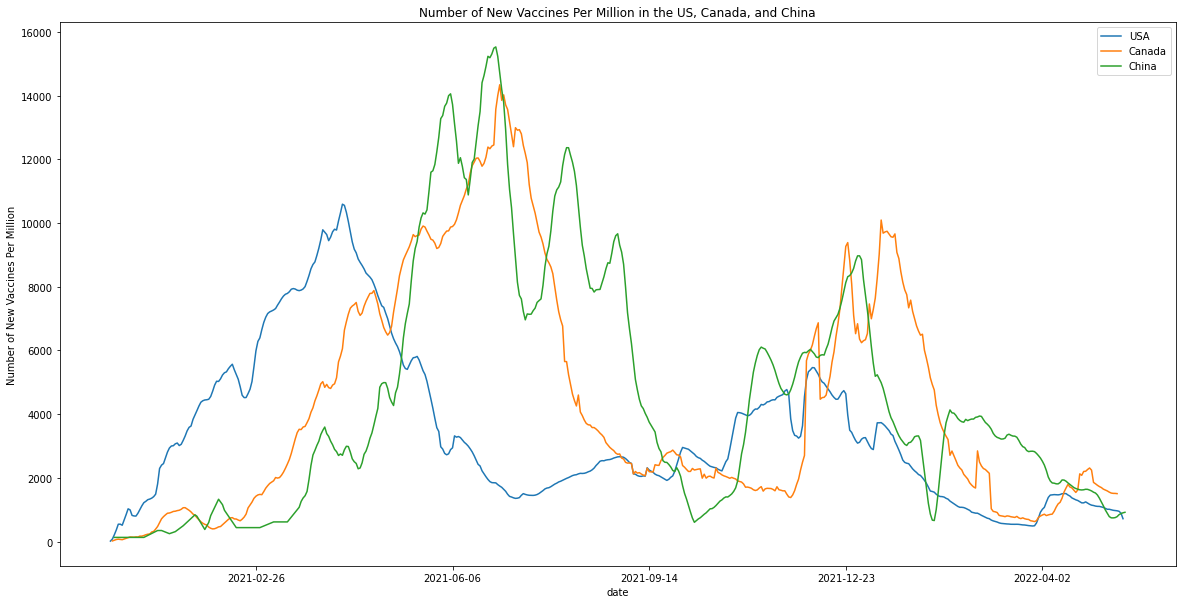

In [922]:
ax = us_data.plot(x='date', y='new_deaths_smoothed_per_million', title='Number of New Deaths Per Million in the US, Canada, and China')
canada_data.plot(x='date', y='new_deaths_smoothed_per_million', ax=ax)
china_data.plot(x='date', y='new_deaths_smoothed_per_million', ax=ax, figsize=(20, 10))
ax.legend(['USA', 'Canada', 'China'])
ax.set_ylabel('Number of New Deaths Per Million')
ax = us_data.plot(x='date', y='new_vaccinations_smoothed_per_million', title='Number of New Vaccines Per Million in the US, Canada, and China')
canada_data.plot(x='date', y='new_vaccinations_smoothed_per_million', ax=ax)
china_data.plot(x='date', y='new_vaccinations_smoothed_per_million', ax=ax, figsize=(20, 10))
ax.legend(['USA', 'Canada', 'China'])
ax.set_ylabel('Number of New Vaccines Per Million')



China continues to be an outlier when it comes to vaccination rates and COVID-19 cases. Looking at the United States, when the number of vaccines fell, in the following months, COVID-19 cases rose rapidly again. According to this LATimes article, after willing people got the vaccine, vaccination rates fell. Despite having a surplus of vaccines available, there was a portion of the US population that refused to get the vaccine. (https://www.latimes.com/world-nation/story/2020-08-20/why-anti-vaxxer-movement-growing-during-coronavirus-pandemic).

Text(0, 0.5, 'Number of New Deaths Per Million')

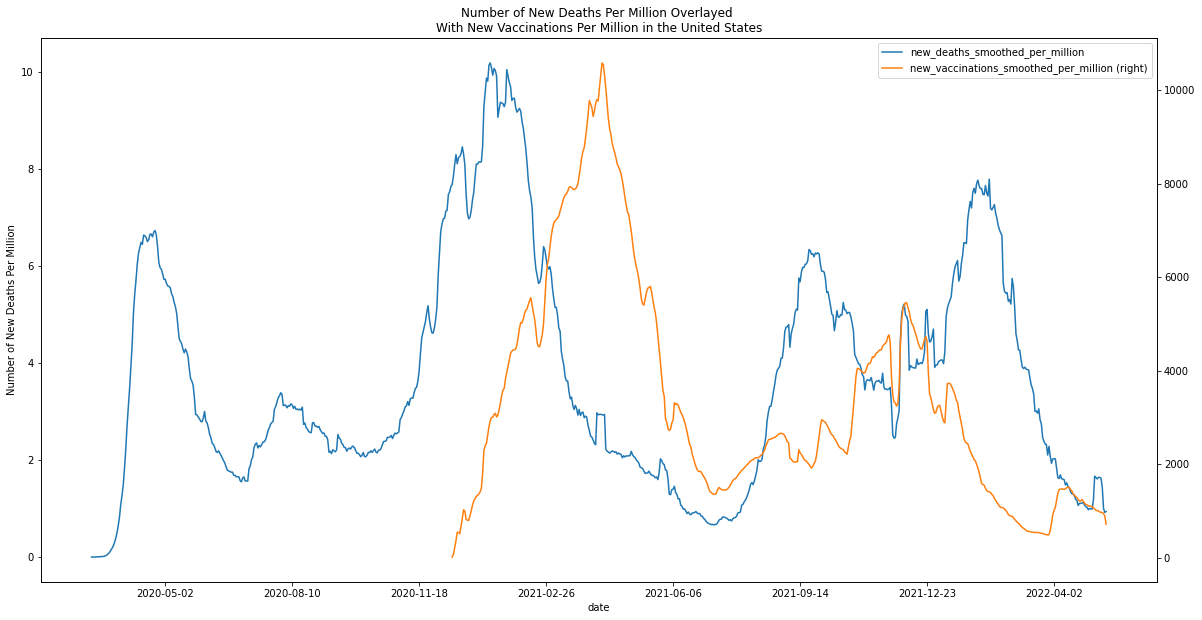

In [923]:
ax = us_data.plot(x='date', y='new_deaths_smoothed_per_million', title='Number of New Deaths Per Million Overlayed \nWith New Vaccinations Per Million in the United States')
us_data.plot(x='date', y='new_vaccinations_smoothed_per_million', secondary_y='new_vaccinations_smoothed_per_million', ax=ax, figsize=(20, 10))
ax.set_ylabel('Number of New Deaths Per Million')

Text(0, 0.5, 'Number of New Deaths Per Million')

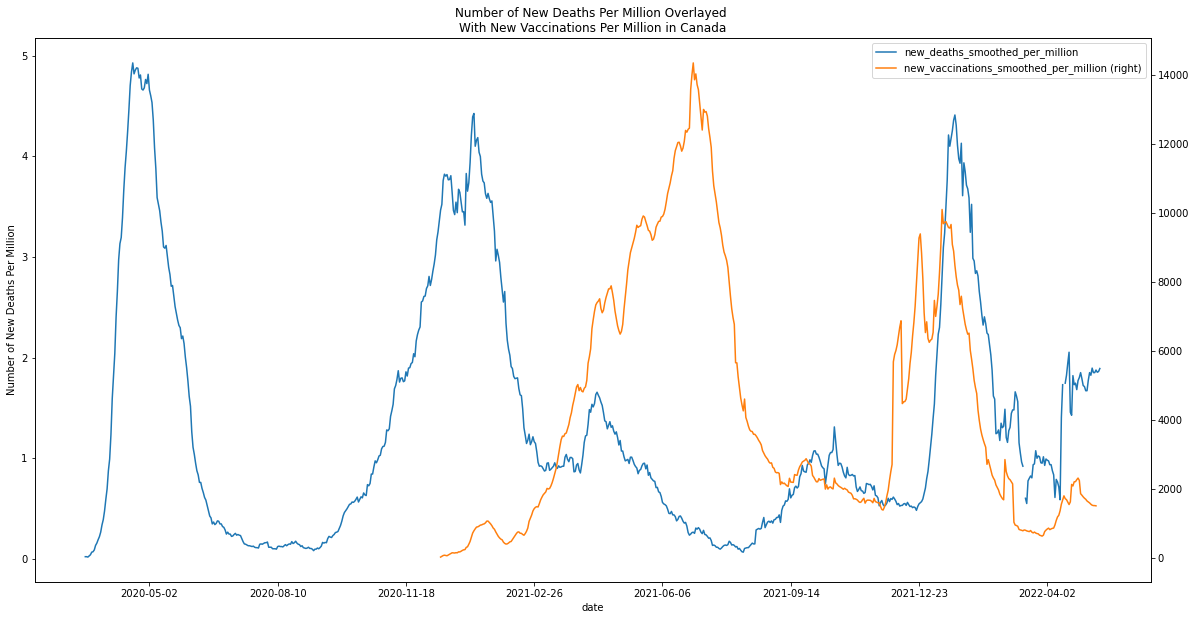

In [924]:
ax = canada_data.plot(x='date', y='new_deaths_smoothed_per_million', title='Number of New Deaths Per Million Overlayed \nWith New Vaccinations Per Million in Canada')
canada_data.plot(x='date', y='new_vaccinations_smoothed_per_million', secondary_y='new_vaccinations_smoothed_per_million', ax=ax, figsize=(20, 10))
ax.set_ylabel('Number of New Deaths Per Million')

Text(0, 0.5, 'Number of New Deaths Per Million')

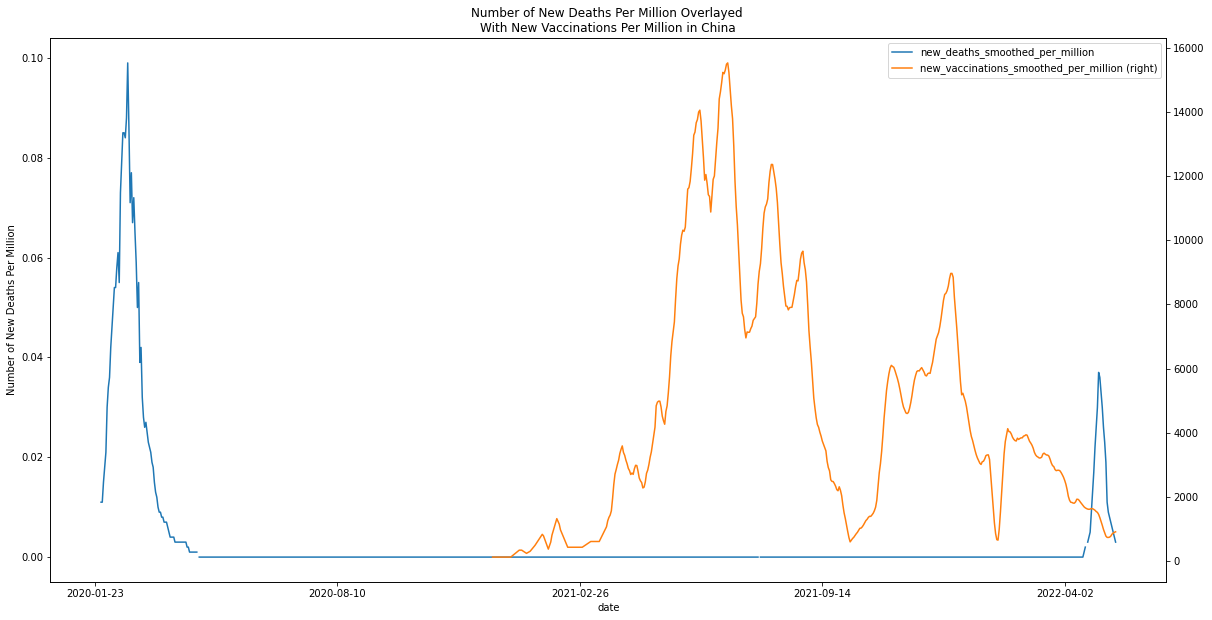

In [925]:
ax = china_data.plot(x='date', y='new_deaths_smoothed_per_million', title='Number of New Deaths Per Million Overlayed \nWith New Vaccinations Per Million in China')
china_data.plot(x='date', y='new_vaccinations_smoothed_per_million', secondary_y='new_vaccinations_smoothed_per_million', ax=ax, figsize=(20, 10))
ax.set_ylabel('Number of New Deaths Per Million')

To reinforce the importance of COVID-19 vaccines when it comes to cases and deaths, these graphs illustrate the correlation between vaccines and number of COVID-19 related deaths. Following the rise of the number of vaccines, in the months after, the number of deaths fell.

# Talk about timing and visual correlation with vaccines and deaths

<h3>Government Policies</h3>

OWID defines the stringency index as a "composite measure based on 9 response indicators including school closures, workplace closures, and travel bans, rescaled to a value from 0 to 100 (100 = strictest response)".

Generally, stricter restrictions reduce the spread of COVID-19. Thus, we should expect countries with higher stringency indices to have fewer COVID-19 cases. While this metric isn't directly related to vaccines, I believe that this metric illustrates China as an outlier. Their strong stringency and "Zero-COVID" policy is a strong contributer to China's low number of cases (https://www.cnn.com/2022/04/27/china/shanghai-deaths-covid-19-underreporting-questions-intl-mic-hnk/index.html).

See https://en.wikipedia.org/wiki/Zero-COVID for more details about "Zero-COVID" policy.

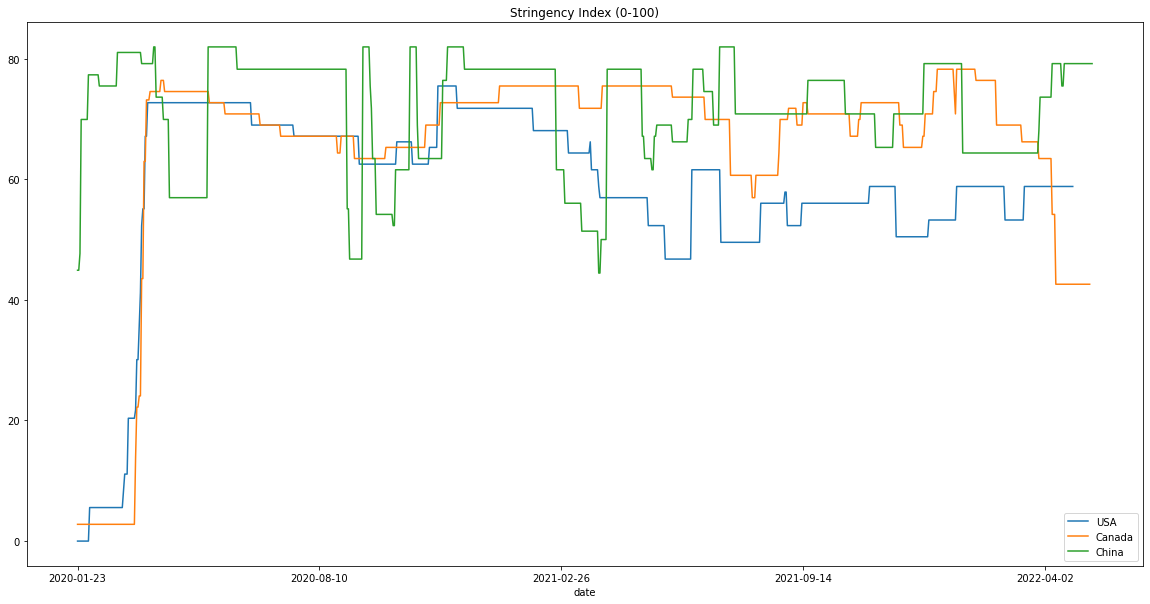

In [926]:
ax = us_data.plot(x='date', y='stringency_index', title='Stringency Index (0-100)')
canada_data.plot(x='date', y='stringency_index', ax=ax)
china_data.plot(x='date', y='stringency_index', ax=ax, figsize=(20, 10))
ax.legend(['USA', 'Canada', 'China'])

In [927]:
us_data['stringency_index'].describe()

count    824.000000
mean      58.492524
std       15.235303
min        0.000000
25%       56.020000
50%       58.800000
75%       68.060000
max       75.460000
Name: stringency_index, dtype: float64

In [928]:
canada_data['stringency_index'].describe()

count    838.000000
mean      65.448854
std       17.340691
min        2.780000
25%       65.280000
50%       70.830000
75%       74.540000
max       78.240000
Name: stringency_index, dtype: float64

In [929]:
china_data['stringency_index'].describe()

count    840.000000
mean      71.691702
std        8.888919
min       44.440000
25%       64.350000
50%       75.460000
75%       78.240000
max       81.940000
Name: stringency_index, dtype: float64

From these stringency index values, unsurprisingly, China comes in first with an average score of 71.69. Canada comes second at 65.45. The United States comes in last at 58.49. These rankings follow the rankings for number of confirmed cases, which makes sense.

<hr>
<h2><center>Predicting COVID-19 Cases</center></h2>
<p> In the last section, we established a visual correlation between vaccines and the number of cases and the number of deaths. Furthermore, we established that the efficacy of vaccines does falter after a certain amount of time. The focus of this section is to develop a model that will attempt to predict the number of cases and the number of deaths. </p>

<p> In this section, we try to use ordinary least squares with various attributes of this dataset and attempt to build a model using multiple attributes. In order to test how well this model fits, we will be testing the model against other countries that are similar to the three countries we have chosen before. The two countries are the United Kingdom and South Korea.</p>

<p>
Ordinary Least Square attempts to estimate an independent variable using observed dependent variables. It changes the coefficients of each variable with the focus of minimizing the residuals. Each OLS model has an associated r-squared adjusted value. This value is the coefficient of determination, which is scaled from [0,1.00]. The coefficient of determination tells us how closely the dependent variables explain the independent variable. Closer to 1 means a stronger correlation between the chosen dependent variables and independent variable.
</p>

<h3> Attributes </h3>

I have chosen the following attributes to initially look at based on the visualizations we looked at in the previous section:
1. new cases smoothed over 7 days per million
2. total number of booster vaccines per hundred
3. new vaccinations smoothed over 7 days per million
4. total number of vaccinations per 100 people per hundred
5. total number of fully vaccinated people per hundred

In [930]:
attributes = ['new_cases_smoothed_per_million', 'total_boosters_per_hundred', 'new_vaccinations_smoothed_per_million', 'total_vaccinations_per_hundred','people_fully_vaccinated_per_hundred']


In the analysis in the exploratory data analysis section, it was noted that there seemed to be a lag between some of the mentioned attributes. Because the dependent variable is lagged, we will have to do some shifting to the data then feed the shifted data into an ordinary least square (OLS) model.

In order to help visualize the effect of shifts, I have created the helper functions below.

In [931]:
# rounds num to 2 decimal places
def trunc(num):
    return int(num*100)/100

In [932]:
# This function returns the best shift for the given attribute for a dataframe
def plot_shifts(data, attr, country):
    rsquared_adj = list()
    best_rsquared = 0
    best_shift = 0
    for i in range(366):
        # Iterate through 0-120 days shift and save the rsquared_adj value
        fit = ols(f'total_cases ~ {attr}.shift(i)', data=data).fit()
        rsquared_adj.append(fit.rsquared_adj)
        if fit.rsquared_adj > best_rsquared:
            best_rsquared = fit.rsquared_adj
            best_shift = i

    ax = pd.DataFrame(rsquared_adj).rename(columns={0:'r^2 adjusted'}).plot(figsize=(20, 10))  
    ax.legend(['r^2 adjusted'])
    ax.set_xlabel('days shifted back')
    ax.set_ylabel('r^2 adjusted')
    plt.title(attr + ' in ' + country)
    plt.plot(best_shift, best_rsquared, 'ro')
    plt.text(best_shift,best_rsquared,f'({best_shift},{trunc(best_rsquared)})')
    
    return best_shift

<h2> Ordinary Least Squared Summaries </h2>
<h3> United States </h3>

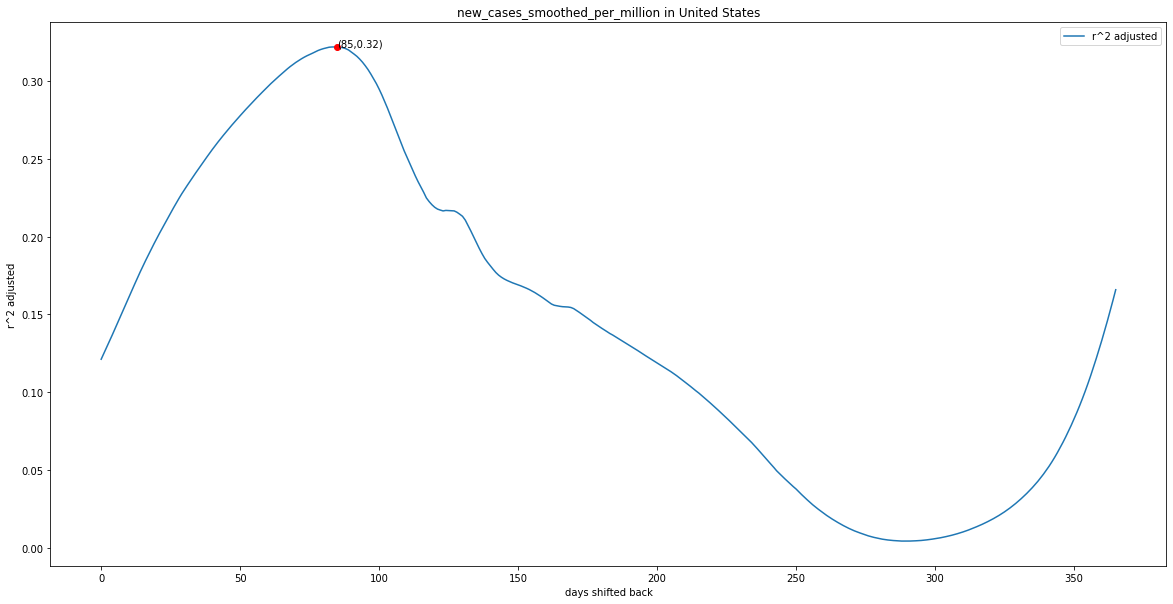

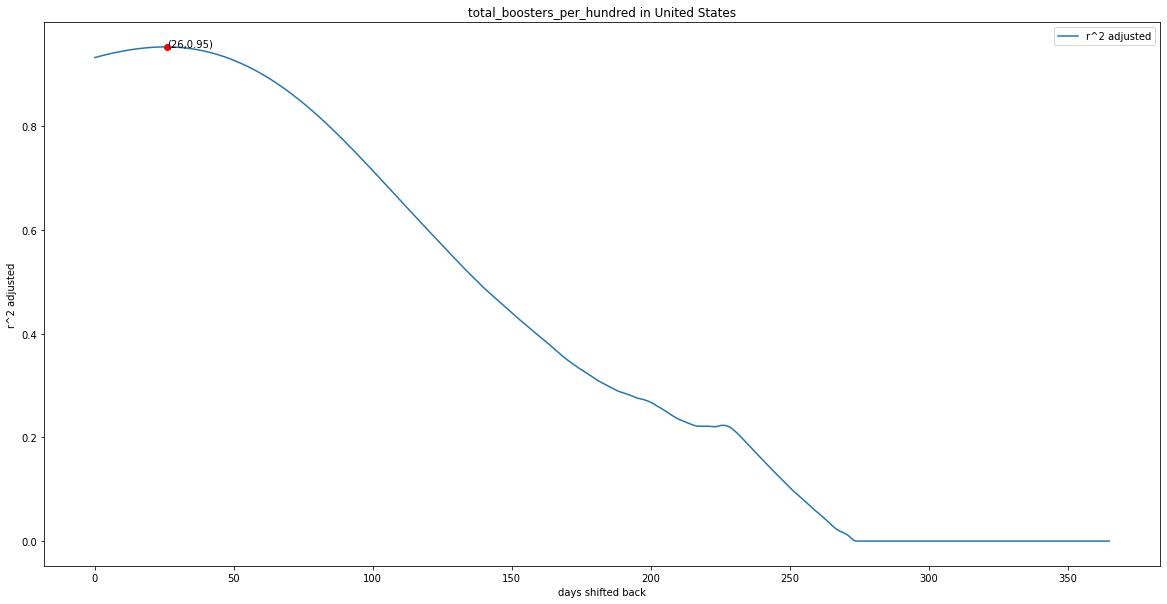

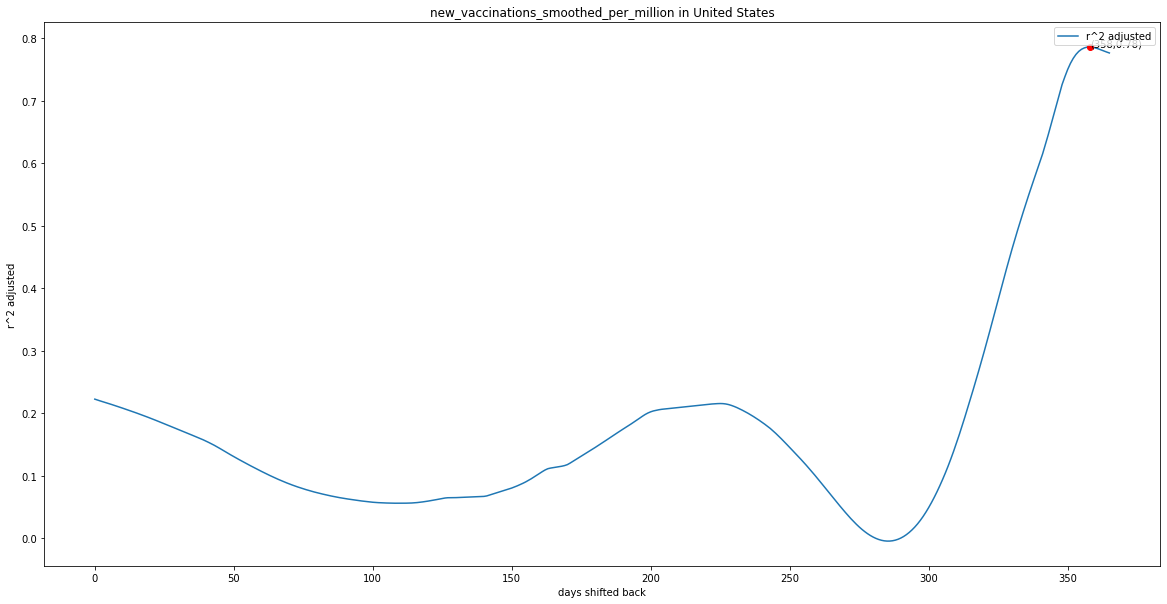

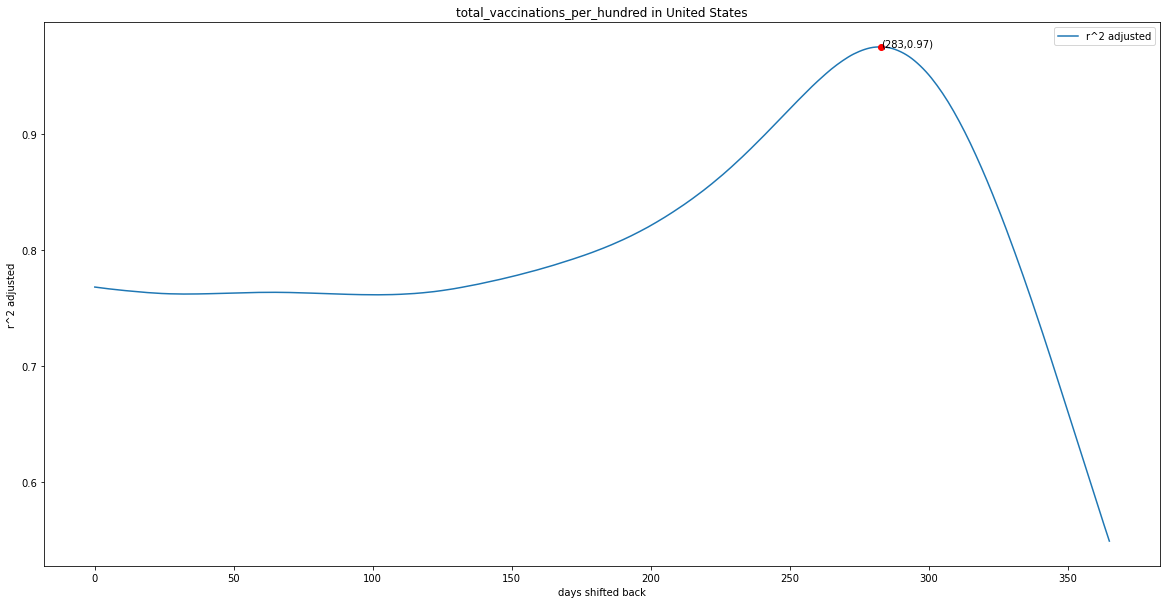

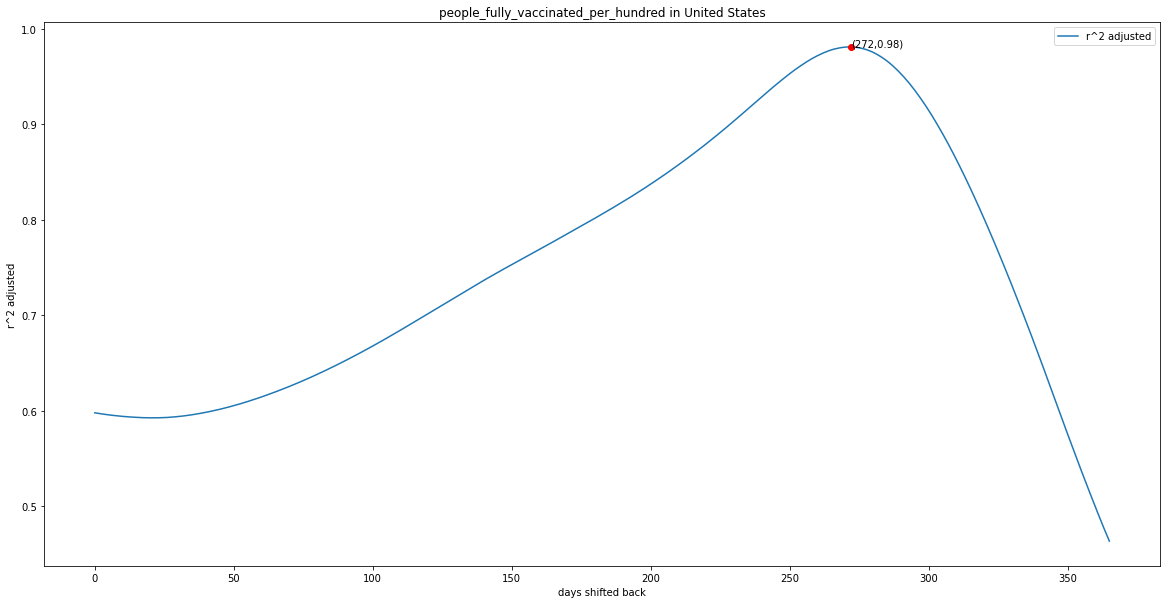

In [933]:
overfitted_shifts = dict()
for attr in attributes:
    overfitted_shifts[attr] = plot_shifts(us_data, attr, 'United States')

Now let's look at the most optimal coefficient of determination with shifts
1. new cases smoothed over 7 days per million: This attribute peaks at 0.32 with a 85 day shift.
2. total number of booster vaccines per hundred: This attribute seems to have some sort of bimodalism. In order to better fit this data, we will be choosing the first shift which is
3. new vaccinations smoothed over 7 days per million: This attribute peaks at 0.78 with a 358 day shift
4. total number of vaccinations per 100 people per hundred: This attribute peaks at 0.97 with a 283 day shift
5. total number of fully vaccinated people per hundred: This attribute peaks at 0.98 with a 272 day shift

With these attributes shifted, let's compare an unshifted OLS vs. a shifted OLS.

In [934]:
# Building formula for unshifted OLS
formula = 'total_cases ~ '
for attr in attributes:
    formula += attr + ' + '
formula = formula[:-3]
# formula += '-1'
print(formula)

total_cases ~ new_cases_smoothed_per_million + total_boosters_per_hundred + new_vaccinations_smoothed_per_million + total_vaccinations_per_hundred + people_fully_vaccinated_per_hundred


In [935]:
fit_us = ols(formula, data=us_data).fit()
fit_us.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_cases   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     4996.
Date:                Mon, 16 May 2022   Prob (F-statistic):               0.00
Time:                        07:00:04   Log-Likelihood:                -7993.9
No. Observations:                 493   AIC:                         1.600e+04
Df Residuals:                     487   BIC:                         1.603e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                              2.254e+07    6.7e+05     33.665      0.000    2.12e+07    2.39e+07
new_cases_smoothed_per_million         -987.9544    291.430     -3.390      0.001   -1560.570    -415.339
total_boosters_per_hundred            -1.239e+06   1.24e+05     -9.986      0.000   -1.48e+06   -9.95e+05
new_vaccinations_smoothed_per_million -2434.7773    109.457    -22.244      0.000   -2649.843   -2219.711
total_vaccinations_per_hundred         2.121e+06   1.03e+05     20.669      0.000    1.92e+06    2.32e+06
people_fully_vaccinated_per_hundred   -4.032e+06   2.02e+05    -19.944      0.000   -4.43e+06   -3.63e+06
==============================================================================
Omnibus:                       35.898   Durbin-Watson:                   0.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               43.069
Skew:                          -0.639   Prob(JB):                     4.44e-10
Kurtosis:                       3.681   Cond. No.                     2.43e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.43e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [936]:
# Building formula for shifted OLS
formula_shifted = 'total_cases ~ '
for attr in attributes:
    formula_shifted += attr + f'.shift({overfitted_shifts[attr]}) + '
formula_shifted = formula_shifted[:-3]
print(formula_shifted)

total_cases ~ new_cases_smoothed_per_million.shift(85) + total_boosters_per_hundred.shift(26) + new_vaccinations_smoothed_per_million.shift(358) + total_vaccinations_per_hundred.shift(283) + people_fully_vaccinated_per_hundred.shift(272)


In [937]:
fit_shifted = ols(formula_shifted, data=us_data).fit()
fit_shifted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_cases   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     1755.
Date:                Mon, 16 May 2022   Prob (F-statistic):          1.83e-132
Time:                        07:00:04   Log-Likelihood:                -2465.1
No. Observations:                 158   AIC:                             4942.
Df Residuals:                     152   BIC:                             4961.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                         3.206e+07   1.71e+06     18.750      0.000    2.87e+07    3.54e+07
new_cases_smoothed_per_million.shift(85)          -755.9834    297.943     -2.537      0.012   -1344.627    -167.339
total_boosters_per_hundred.shift(26)              1.744e+06   2.58e+05      6.768      0.000    1.23e+06    2.25e+06
new_vaccinations_smoothed_per_million.shift(358)   -72.5396    126.793     -0.572      0.568    -323.045     177.966
total_vaccinations_per_hundred.shift(283)        -1.133e+06   1.67e+05     -6.774      0.000   -1.46e+06   -8.03e+05
people_fully_vaccinated_per_hundred.shift(272)    2.289e+06   3.76e+05      6.094      0.000    1.55e+06    3.03e+06
==============================================================================
Omnibus:                        3.059   Durbin-Watson:                   0.085
Prob(Omnibus):                  0.217   Jarque-Bera (JB):                3.096
Skew:                           0.111   Prob(JB):                        0.213
Kurtosis:                       3.649   Cond. No.                     9.50e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.5e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The coefficient of determination of the unshifted vs shifted OLS are very close (0.981 vs. 0.982). Now would also be a good time to talk about using lagged dependent variables for OLS. While it makes sense to use previous data to make educated guesses about the future, there are some major downfalls. The most dangerous impact (pertaining to data science) is the danger of bias. There has to be strong consideration for the theory behind whether a specific dependent variable has direct impact on the independent variable. Because I don't have a background in vaccine research, I will refrain from using lagged dependent variables, especially since it seems like unshifted variables are close relative to the shifted variables.

<h3> Canada </h3>

In [938]:
fit_canada = ols(formula, data=canada_data).fit()
fit_canada.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_cases   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 1.869e+04
Date:                Mon, 16 May 2022   Prob (F-statistic):               0.00
Time:                        07:00:04   Log-Likelihood:                -5599.8
No. Observations:                 450   AIC:                         1.121e+04
Df Residuals:                     444   BIC:                         1.124e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                              8.931e+05   8916.287    100.163      0.000    8.76e+05    9.11e+05
new_cases_smoothed_per_million           41.2666     18.781      2.197      0.029       4.356      78.177
total_boosters_per_hundred             2.397e+04    528.219     45.384      0.000    2.29e+04     2.5e+04
new_vaccinations_smoothed_per_million   -19.7981      1.591    -12.442      0.000     -22.925     -16.671
total_vaccinations_per_hundred         1.299e+04    433.183     29.997      0.000    1.21e+04    1.38e+04
people_fully_vaccinated_per_hundred   -1.669e+04    807.835    -20.657      0.000   -1.83e+04   -1.51e+04
==============================================================================
Omnibus:                       18.513   Durbin-Watson:                   0.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                9.616
Skew:                           0.154   Prob(JB):                      0.00817
Kurtosis:                       2.354   Cond. No.                     1.85e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.85e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Using this five variable approach, we get a very high coefficient of determination of 0.995 for the Canada dataset.

<h3> China </h3>

In [939]:
fit_china = ols(formula, data=china_data).fit()
fit_china.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_cases   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.601
Method:                 Least Squares   F-statistic:                     6.731
Date:                Mon, 16 May 2022   Prob (F-statistic):            0.00216
Time:                        07:00:04   Log-Likelihood:                -271.39
No. Observations:                  20   AIC:                             554.8
Df Residuals:                      14   BIC:                             560.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                              1.032e+05   3.22e+06      0.032      0.975   -6.79e+06       7e+06
new_cases_smoothed_per_million         2.448e+04   1.06e+04      2.315      0.036    1796.979    4.72e+04
total_boosters_per_hundred            -4.542e+04   4.94e+04     -0.919      0.374   -1.51e+05    6.06e+04
new_vaccinations_smoothed_per_million  -104.4345     62.308     -1.676      0.116    -238.073      29.204
total_vaccinations_per_hundred         4.767e+04   5.08e+04      0.938      0.364   -6.14e+04    1.57e+05
people_fully_vaccinated_per_hundred   -9.538e+04   9.63e+04     -0.990      0.339   -3.02e+05    1.11e+05
==============================================================================
Omnibus:                        8.096   Durbin-Watson:                   0.731
Prob(Omnibus):                  0.017   Jarque-Bera (JB):                5.444
Skew:                           1.040   Prob(JB):                       0.0657
Kurtosis:                       4.487   Cond. No.                     2.32e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The OLS for China performed more poorly with a coefficient of determination of 0.601. Furthermore, the p-values for each dependent variable is varied, indicating that the statistical signficance of these variables is low. This is expected because of the not complete data collection from the Chinese government. Furthermore, we have noted that China is an extreme outlier when it comes to COVID-19 cases.
<h2>Predicting COVID-19 Cases</h2>

Using our OLS fits that we created for the United States, Canada, and China, we will try to predict the number of COVID-19 cases for other countries (United Kingdom and South Korea).

First, let's start by creating dataframes for the United Kingdom and South Korea.

In [940]:
attributes.append('total_cases')
uk_data = data[data['location'] == 'United Kingdom'].reset_index().drop(columns=['index'])
uk_data = uk_data[attributes]
sk_data = data[data['location'] == 'South Korea'].reset_index().drop(columns=['index'])
sk_data = sk_data[attributes]

Now let's fit the United Kingdom to Canada. After trying with US and China, the UK had the best fit with Canada. Similarly, the UK and Canada are the most similar to each other of the three countries we have chosen.

We will also fit South Korea to China's OLS model. This is because both of these countries are considered countries that are trying to follow the "Zero-COVID" policy that was mentioned earlier. Furthermore, looking at the number of cases, South Korea follows the trend line more closely to China's than Canada's and the US'.

Text(0.5, 1.0, "Predicting Total Cases For the United Kingdom Using Canada's OLS Model\nBlue = Predicted, Orange = Actual")

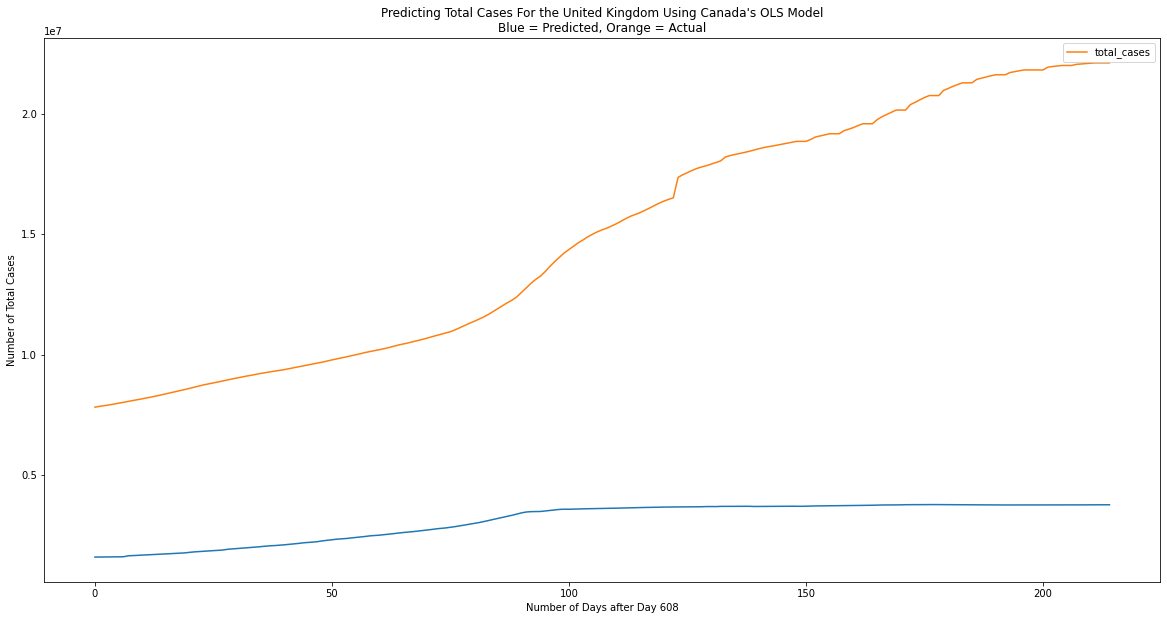

In [941]:
uk_fit = fit_canada.get_prediction(uk_data.dropna()).summary_frame(alpha=0.05)
ax = uk_fit['mean'].plot(figsize=(20, 10))
# Use rows that have all values necessary for fitting
uk_data['total_cases'].iloc[608:823].reset_index().drop(columns=['index']).plot(ax=ax)
ax.set_ylabel('Number of Total Cases')
ax.set_xlabel('Number of Days after Day 608')
ax.set_title('Predicting Total Cases For the United Kingdom Using Canada\'s OLS Model\nBlue = Predicted, Orange = Actual')

From visual inspection, the prediction for the United Kingdom did poorly. Even with the intercept being included, the model fails to predict the total number of COVID-19 cases accurately.

Text(0.5, 1.0, "Predicting Total Cases For South Korea Using China's OLS Model\nBlue = Predicted, Orange = Actual")

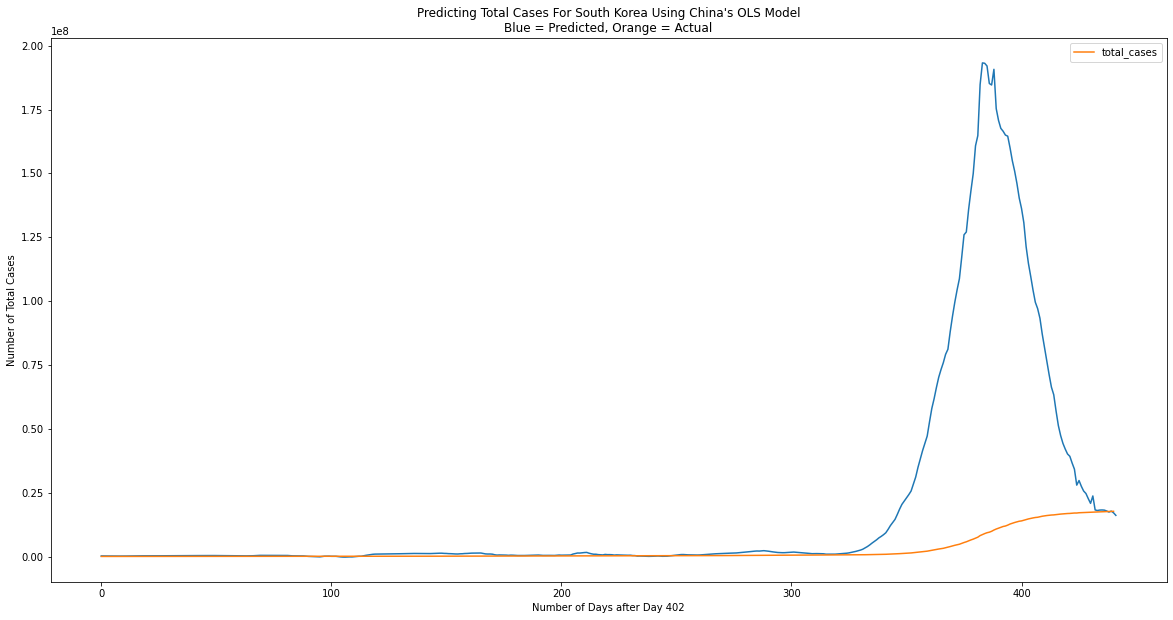

In [942]:
sk_fit = fit_china.get_prediction(sk_data.dropna()).summary_frame(alpha=0.05)
ax = sk_fit['mean'].plot(figsize=(20, 10))
sk_data['total_cases'].iloc[402:843].reset_index().drop(columns=['index']).plot(ax=ax)
ax.set_ylabel('Number of Total Cases')
ax.set_xlabel('Number of Days after Day 402')
ax.set_title('Predicting Total Cases For South Korea Using China\'s OLS Model\nBlue = Predicted, Orange = Actual')

The prediction for South Korea using China is much closer. From days from 402 to approximately 702 (402 + 300), the total number of cases is close. But this model also fails once the number of cases begins to go up.

<h2>Why?</h2>

Let's take a look at an example in which we use the OLS model for US and Canada to predict the total number of cases for the US and Canada, respectively. To better illustrate the point of the difficulty in predicting values, we will be using the shifted (overfitted) OLS model.

Text(0.5, 1.0, 'Predicting US total cases using US OLS Model')

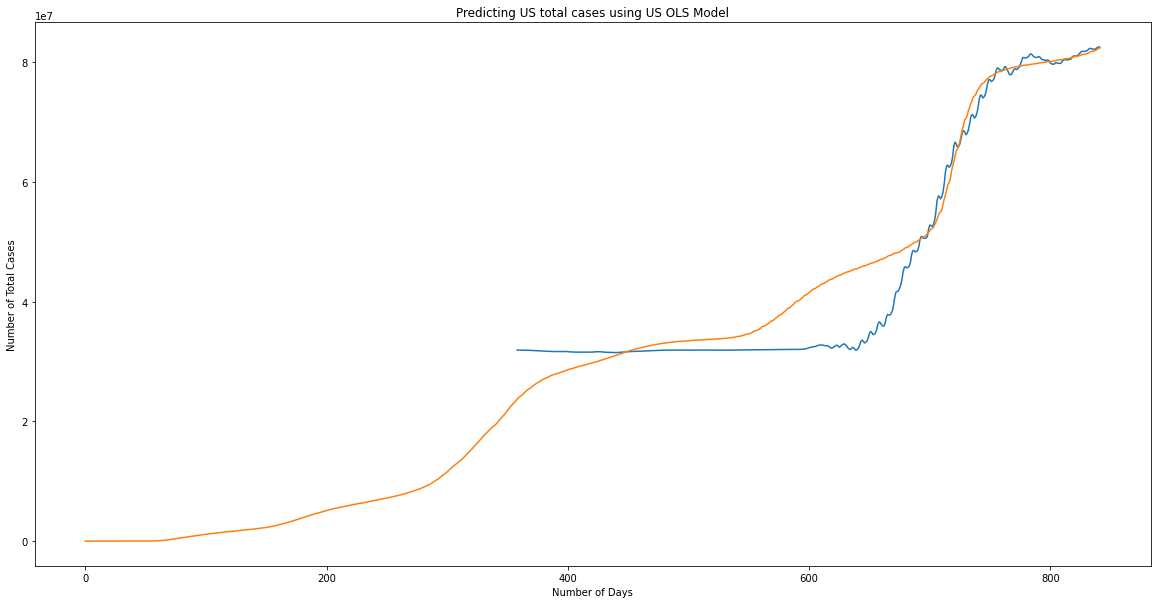

In [943]:
us_fit = fit_shifted.predict(us_data.fillna(0))
ax = us_fit.plot(figsize=(20, 10))
us_data['total_cases'].plot(ax=ax)
ax.set_ylabel('Number of Total Cases')
ax.set_xlabel('Number of Days')
ax.set_title('Predicting US total cases using US OLS Model')

Text(0.5, 1.0, 'Predicting Canada total cases using Canada OLS Model')

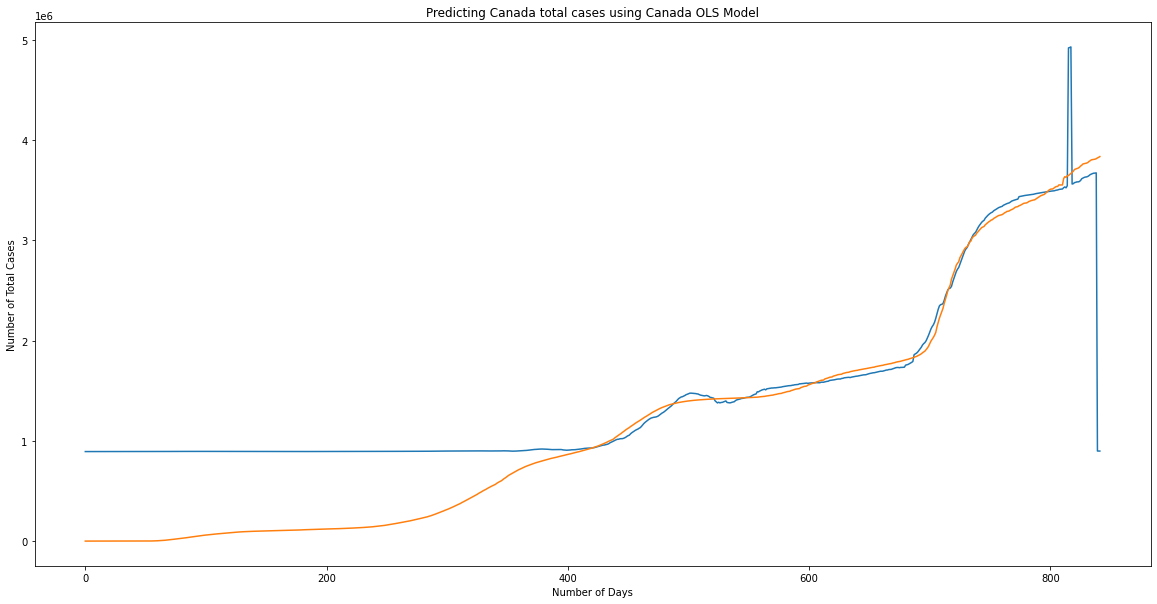

In [944]:
canada_fit = fit_canada.predict(canada_data.fillna(0))
ax = canada_fit.plot(figsize=(20, 10))
canada_data['total_cases'].plot(ax=ax)
ax.set_ylabel('Number of Total Cases')
ax.set_xlabel('Number of Days')
ax.set_title('Predicting Canada total cases using Canada OLS Model')

Both of these models suffer from the flaws of using OLS Models to predict values. There are a few assumptions that we have to make in order to utilize an OLS fit.
1. The variables should be linear in parameters. From our exploratory analysis, this was not always the case for all of the countries.
2. The OLS models may have been overfit for the specific dataset that it was fit on. Even when using the same dataset to predict total number of cases, we still got wrong predictions. While they were close, we would expect them to be closer than what they were. Furthermore, the countries they were compared to are very different in how they operate and how their governments approached COVID-19. For example, China is likely one of the strictest countries when dealing with COVID-19. While both China and South Korea have a "Zero-COVID" policy, it is still difficult to apply China's fit to South Korea.
3. Bias in data. Because the data set is scraped from information that is given by the governments, there could be inaccuracies or purposeful bias. Without the natural data, it is hard to predict the natural spread of COVID-19 because the data has been tinkered with.

<hr>
<h1> <center>Conclusion and Further Exploration </center></h1>
Through our exploratory data analysis of COVID-19 and the rollout of COVID-19 vaccines, we now know the importance of vaccines when combatting diseases and keeping the population healthy. As COVID-19 mutates into deadlier variants, we need to remain vigilant. From the data analysis in this Jupyter Notebook, we have confirmed that the efficacy of the COVID-19 vaccines have gone down over time, resulting in increasing COVID-19 cases. As shown by the correlation between booster shots of the vaccine and COVID-19 cases, there may be a need to continue to get COVID-19 vaccine annually. This falls in line similarly to the flu shot.

There is a lot of information within this dataset from Our World In Data regarding the COVID-19 pandemic. The scope of this was limited to only three countries and then attempting to generalize to two other countries. Rather than arbitrarily choosing these countries, better analysis could be done by randomizing or generalizing countries. This project has shown the difficulty in trying to create accurate models. In particular, this project has taught me the weaknesses of prediction models such as the ordinary least squares (OLS) model.

At the end of the day, data science is about exploring vast amount of data and trying to tell a story. To summarize in one sentence: COVID-19 has shown us a changing world in which people will have to adapt and accept new technology and social change in order to protect others.